In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('data/achondroplasia_and_control_dataset.csv')
X_train = df[['control_height', 'control_weight']]
X_test = df[['achondroplasia_height', 'achondroplasia_weight']]
X_train.columns = ['h', 'w']
X_test.columns = ['h', 'w']

y_train = df['control_age']
y_test = df['achondroplasia_age']

In [39]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF
from sklearn.metrics import r2_score, mean_absolute_error

kernel = 1.0 * RBF(length_scale=1e1, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(
    noise_level=1, noise_level_bounds=(1e-5, 1e3)
)

# kernel = 1.0 * DotProduct(sigma_0=1., sigma_0_bounds=(1e-3, 1e3))+ WhiteKernel(
#     noise_level=1, noise_level_bounds=(1e-3, 1e3)
# )

model = GaussianProcessRegressor(kernel=kernel,)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print(f'R2 train = {r2_score(y_train, y_train_predict)}')
print(f'R2 test = {r2_score(y_test, y_test_predict)}')
print(f'MAE train = {mean_absolute_error(y_train, y_train_predict)}')
print(f'MAE test = {mean_absolute_error(y_test, y_test_predict)}')

R2 train = 0.9119319011605567
R2 test = -0.6134070649026679
MAE train = 1.643438977777392
MAE test = 7.225534615006766


In [40]:
model.kernel_

20.5**2 * RBF(length_scale=63.2) + WhiteKernel(noise_level=4.52)

In [41]:
y_train_predict, y_train_std = model.predict(X_train, return_std=True)
y_test_predict, y_test_std = model.predict(X_test, return_std=True)

<AxesSubplot:ylabel='Density'>

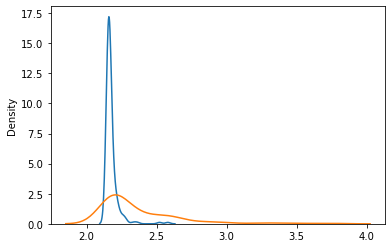

In [42]:
sns.kdeplot(y_train_std)
sns.kdeplot(y_test_std)

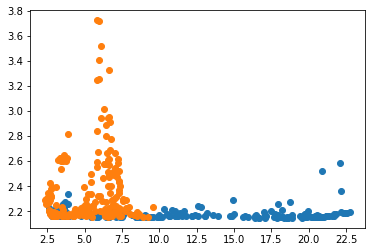

In [43]:
plt.scatter(y_train_predict, y_train_std)
plt.scatter(y_test_predict, y_test_std)

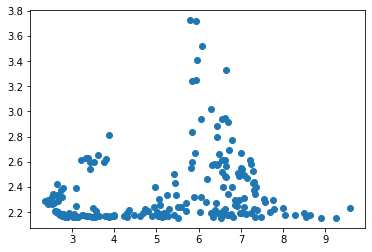